In [6]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from road import Road

%matplotlib inline

In [7]:
road = Road(number_of_cars=30)
road.place_cars()

speed_limits = []
mean_speeds = []
positions_list = []
iteration_number = 10
for _ in range(iteration_number):
    speeds, positions = road.simulate_n_seconds(60)

    speed_limit = np.mean(speeds) + np.std(speeds)
    mean_speeds.append(np.mean(speeds))
    speed_limits.append(speed_limit)

#     if _ > iteration_number - 3:
    positions_list.append(positions)

ave_speed = int(np.mean(speed_limits))

AttributeError: 'Road' object has no attribute 'length_of_road'

In [8]:
sec_2_positions = np.array([[961, 962, 963, 964, 965],
        [928, 929, 930, 931, 932],
        [895, 896, 897, 898, 899],
        [862, 863, 864, 865, 866],
        [829, 830, 831, 832, 833],
        [796, 797, 798, 799, 800],
        [763, 764, 765, 766, 767],
        [730, 731, 732, 733, 734],
        [697, 698, 699, 700, 701],
        [664, 665, 666, 667, 668],
        [631, 632, 633, 634, 635],
        [598, 599, 600, 601, 602],
        [565, 566, 567, 568, 569],
        [532, 533, 534, 535, 536],
        [499, 500, 501, 502, 503],
        [466, 467, 468, 469, 470],
        [433, 434, 435, 436, 437],
        [400, 401, 402, 403, 404],
        [367, 368, 369, 370, 371],
        [334, 335, 336, 337, 338],
        [301, 302, 303, 304, 305],
        [268, 269, 270, 271, 272],
        [235, 236, 237, 238, 239],
        [202, 203, 204, 205, 206],
        [169, 170, 171, 172, 173],
        [136, 137, 138, 139, 140],
        [103, 104, 105, 106, 107],
        [ 70,  71,  72,  73,  74],
        [ 37,  38,  39,  40,  41],
        [  4,   5,   6,   7,   8]])
sec_2_positions = np.ndarray.flatten(sec_2_positions)
sec_1_positions = sec_2_positions[:] - 2
sec_3_positions = sec_2_positions[:] + 2

In [19]:
position_matrix = []
position_matrix.append(sec_1_positions)
position_matrix.append(sec_2_positions)
position_matrix.append(sec_3_positions)
position_matrix = [item for sublist in position_matrix for item in sublist]
position_matrix = np.array(position_matrix)
print(position_matrix)

[959 960 961 962 963 926 927 928 929 930 893 894 895 896 897 860 861 862
 863 864 827 828 829 830 831 794 795 796 797 798 761 762 763 764 765 728
 729 730 731 732 695 696 697 698 699 662 663 664 665 666 629 630 631 632
 633 596 597 598 599 600 563 564 565 566 567 530 531 532 533 534 497 498
 499 500 501 464 465 466 467 468 431 432 433 434 435 398 399 400 401 402
 365 366 367 368 369 332 333 334 335 336 299 300 301 302 303 266 267 268
 269 270 233 234 235 236 237 200 201 202 203 204 167 168 169 170 171 134
 135 136 137 138 101 102 103 104 105  68  69  70  71  72  35  36  37  38
  39   2   3   4   5   6 961 962 963 964 965 928 929 930 931 932 895 896
 897 898 899 862 863 864 865 866 829 830 831 832 833 796 797 798 799 800
 763 764 765 766 767 730 731 732 733 734 697 698 699 700 701 664 665 666
 667 668 631 632 633 634 635 598 599 600 601 602 565 566 567 568 569 532
 533 534 535 536 499 500 501 502 503 466 467 468 469 470 433 434 435 436
 437 400 401 402 403 404 367 368 369 370 371 334 33

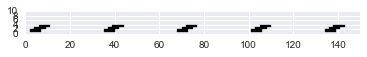

In [22]:
from matplotlib.patches import Rectangle


x = position_matrix
# y_list = []
# for number in range(0,61):
#     y_list.append([number]*150)
# Y = np.ndarray.flatten(np.array(y_list))

y = [1]*150 + [2]*150 + [3]*150
dx = [1]*150*3

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

for x, y, h in zip(x, y, dx):
    ax.add_artist(Rectangle(xy=(x, y), color='black', width=h, height=h))      # Gives a square of area h*h

axes = plt.gca()
axes.set_xlim([0,150])
axes.set_ylim([0,10])
# plt.plot((10, 10), (0, 120), 'red-')

plt.show()